In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns


In [139]:
df = pd.read_csv('merc.csv')

In [140]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


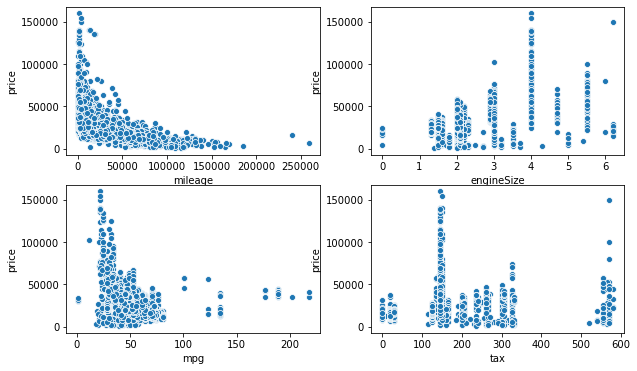

In [142]:
fig, ax = plt.subplots(2,2, figsize=(10,6))
sns.scatterplot(x='mileage',y='price',data=df,ax=ax[0,0])
sns.scatterplot(x='engineSize',y='price',data=df,ax=ax[0,1])
sns.scatterplot(x='mpg',y='price',data=df,ax=ax[1,0])
sns.scatterplot(x='tax',y='price',data=df,ax=ax[1,1])

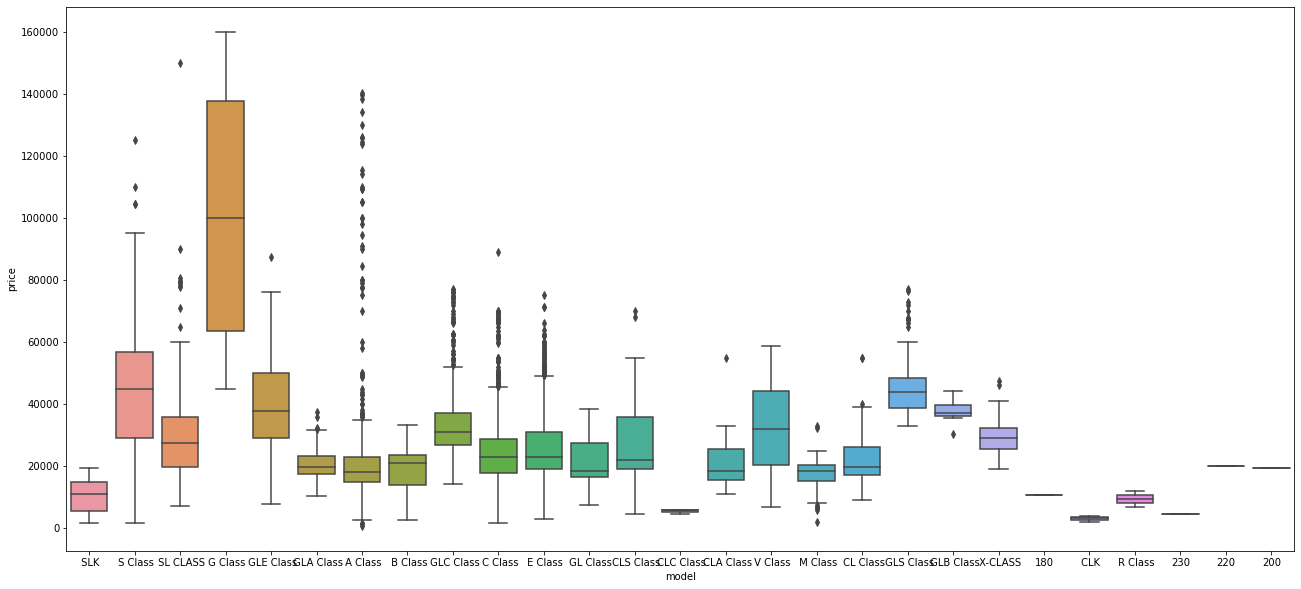

In [143]:
plt.figure(figsize=(22,10))
sns.boxplot(y='price',x='model',data=df)

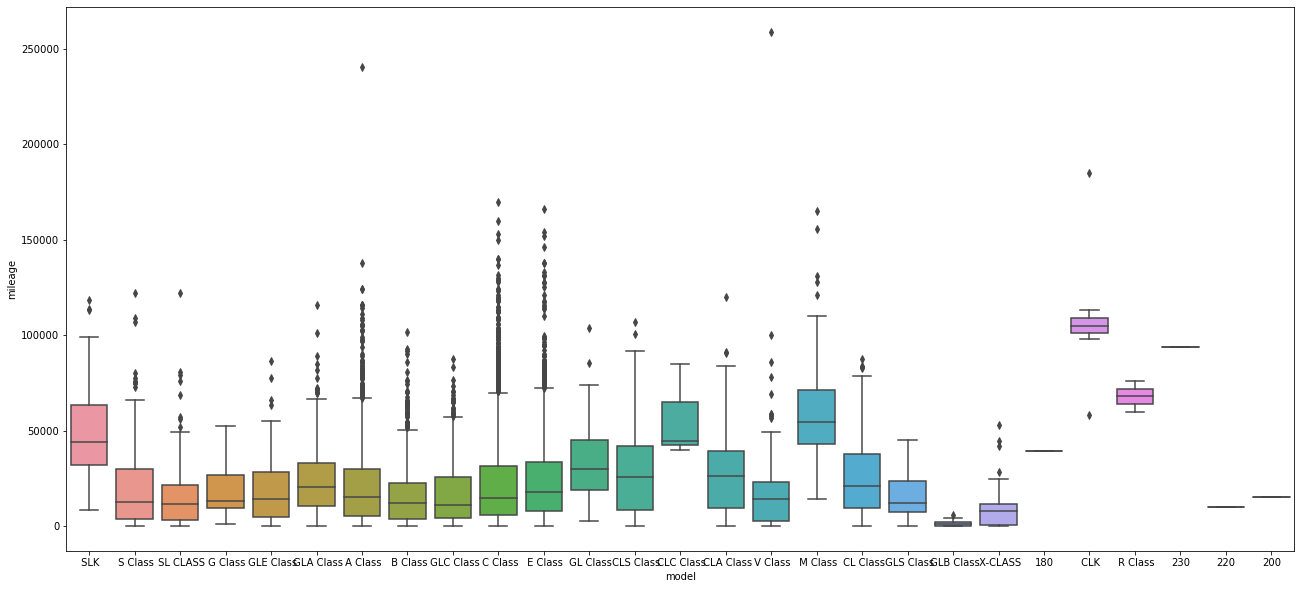

In [144]:
plt.figure(figsize=(22,10))

sns.boxplot(y='mileage',x='model',data=df)

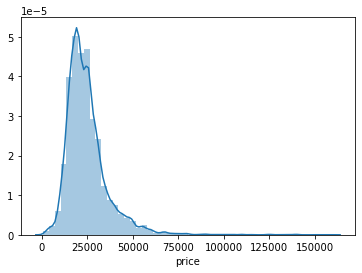

In [145]:
sns.distplot(df['price'])

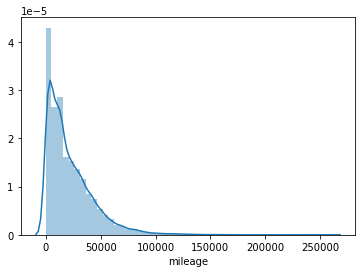

In [146]:
sns.distplot(df['mileage'])

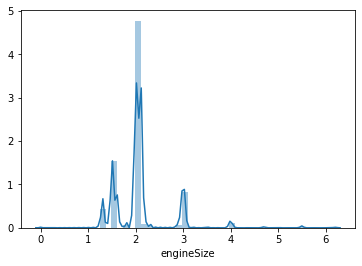

In [147]:
sns.distplot(df['engineSize'])

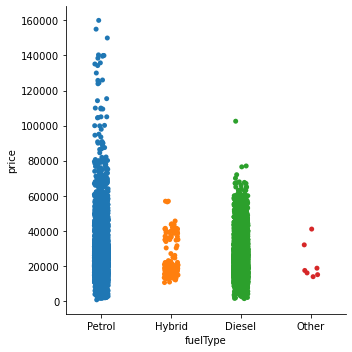

In [148]:
sns.catplot(y='price',x='fuelType',data=df)

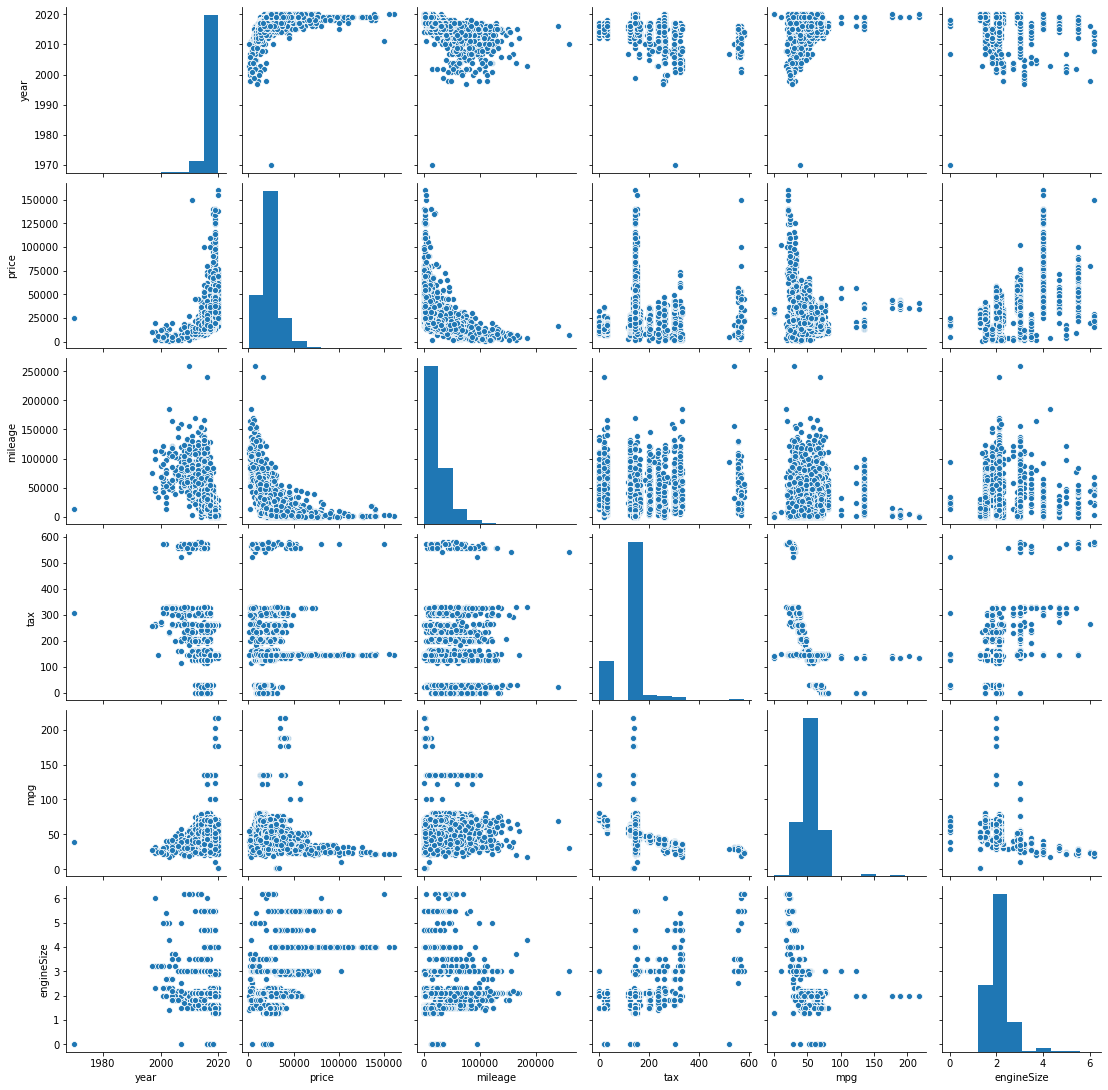

In [149]:
sns.pairplot(df,palette='rainbow')

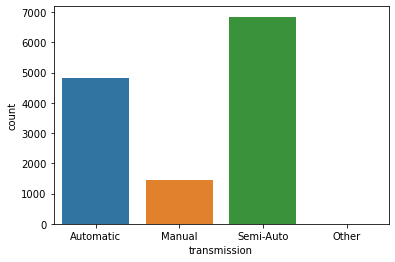

In [150]:
sns.countplot(df['transmission'])

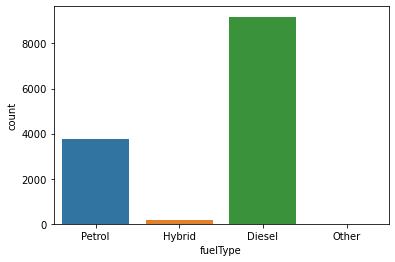

In [151]:
sns.countplot(df['fuelType'])


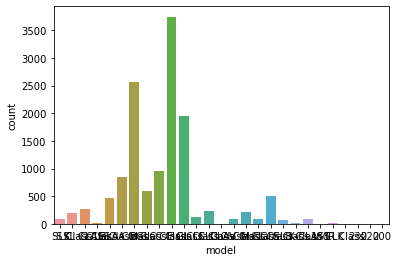

In [152]:
sns.countplot(df['model'])

In [153]:
from sklearn.preprocessing import OrdinalEncoder

In [154]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [155]:
oe = OrdinalEncoder()


In [156]:
oe = oe.fit_transform(df[['model','transmission','fuelType']])

In [157]:
df[['model','transmission','fuelType']] = oe

In [158]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,20.0,2005,5200,0.0,63000,3.0,325,32.1,1.8
1,18.0,2017,34948,0.0,27000,1.0,20,61.4,2.1
2,19.0,2016,49948,0.0,6200,3.0,555,28.0,5.5
3,9.0,2016,61948,0.0,16000,3.0,325,30.4,4.0
4,9.0,2016,73948,0.0,4000,3.0,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,2.0,2020,35999,0.0,500,0.0,145,55.4,2.0
13115,1.0,2020,24699,0.0,2500,0.0,145,55.4,2.0
13116,13.0,2019,30999,0.0,11612,0.0,145,41.5,2.1
13117,7.0,2019,37990,0.0,2426,0.0,145,45.6,2.0


In [159]:
df1 = df[df['year']<1990]

In [160]:
df1['year'] = 0

<ipython-input-160-8546701b8124>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = 0


In [161]:
df2 = df[df['year']<2000]

In [162]:
df2['year'] = 1

<ipython-input-162-bbd86c2d1ab5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = 1


In [163]:
df3 = df[df['year']<2010]

In [164]:
df3['year'] = 2

<ipython-input-164-43da9dde9cd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['year'] = 2


In [165]:
df4 = df[df['year']<2022]

In [166]:
df4['year'] = 3

In [167]:
df = pd.concat([df1,df2,df3,df4])

In [168]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12072,16.0,0,24999,0.0,14000,0.0,305,39.2,0.0
11764,20.0,1,1990,0.0,99300,3.0,265,32.1,2.3
11794,18.0,1,19990,0.0,43534,3.0,265,23.3,6.0
11808,20.0,1,1990,0.0,113557,3.0,265,32.1,2.3
11860,19.0,1,10450,0.0,49000,3.0,255,28.2,3.2
...,...,...,...,...,...,...,...,...,...
13114,2.0,3,35999,0.0,500,0.0,145,55.4,2.0
13115,1.0,3,24699,0.0,2500,0.0,145,55.4,2.0
13116,13.0,3,30999,0.0,11612,0.0,145,41.5,2.1
13117,7.0,3,37990,0.0,2426,0.0,145,45.6,2.0


In [169]:
X = df.drop('price',axis=1)
y = df['price']

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Regression model

In [172]:
df.corr()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,1.000000,-0.098415,0.310811,-0.024104,0.014453,-0.150656,0.319199,-0.286710,0.430217
year,-0.098415,1.000000,0.143483,0.102646,-0.242497,-0.068243,-0.261836,0.136839,-0.089948
price,0.310811,0.143483,1.000000,0.154452,-0.548868,0.174749,0.210434,-0.407092,0.484877
transmission,-0.024104,0.102646,0.154452,1.000000,-0.239022,0.025281,-0.023676,-0.008151,-0.036179
mileage,0.014453,-0.242497,-0.548868,-0.239022,1.000000,-0.189522,-0.074526,0.155495,0.084305
fuelType,-0.150656,-0.068243,0.174749,0.025281,-0.189522,1.000000,0.268922,-0.484617,-0.035060
tax,0.319199,-0.261836,0.210434,-0.023676,-0.074526,0.268922,1.000000,-0.524790,0.350570
mpg,-0.286710,0.136839,-0.407092,-0.008151,0.155495,-0.484617,-0.524790,1.000000,-0.347934
engineSize,0.430217,-0.089948,0.484877,-0.036179,0.084305,-0.035060,0.350570,-0.347934,1.000000


In [173]:
x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     2809.
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        12:37:23   Log-Likelihood:            -1.3659e+05
No. Observations:               13248   AIC:                         2.732e+05
Df Residuals:                   13239   BIC:                         2.733e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -811.1861   1982.440     -0.409      0.682   -4697.053    3074.681
model          248.9468     12.646     19.685      0.000     224.158     273.735
year          6448.5453    627.477     10.277      0.000    5218.601    7678.489
transmission   283.7802     46.016      6.167      0.000     193.582     373.978
mileage         -0.2919      0.003    -92.778      0.000      -0.298      -0.286
fuelType       562.1324     58.015      9.689      0.000     448.414     675.850
tax            -21.2219      1.158    -18.326      0.000     -23.492     -18.952
mpg           -128.1245      5.746    -22.296      0.000    -139.388    -116.861
engineSize    9644.6763    128.236     75.210      0.000    9393.315    9896.038
==============================================================================
Omnibus:                     9282.119   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           465305.486
Skew:                           2.800   Prob(JB):                         0.00
Kurtosis:                      31.488   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [177]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(x.values,i)
                    for i in range (X.shape[1])]
vif

,Features,VIF Factor
0,model,985.379241
1,year,1.412025
2,transmission,1.166637
3,mileage,1.064164
4,fuelType,1.207393
5,tax,1.553146
6,mpg,1.578150
7,engineSize,1.942410


In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [180]:
lr_prediction = lr.predict(X_test)

In [181]:
lr.score(X_train,y_train)

0.6348690029924616

In [182]:
from sklearn.metrics import accuracy_score

In [187]:
lr.intercept_

-1770.351289121034

In [193]:
lr.coef_

array([ 2.45618504e+02,  6.94090120e+03,  2.89712257e+02, -2.94722901e-01,
        5.41793498e+02, -2.27333928e+01, -1.40378771e+02,  9.86567590e+03])

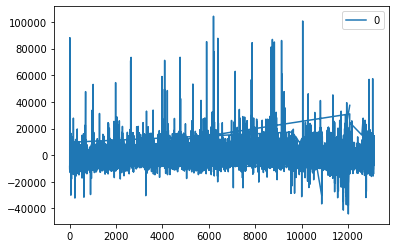

In [198]:
resid = pd.DataFrame(result.resid)
resid.plot()

In [195]:
probplot = sm.ProbPlot(result.resid)

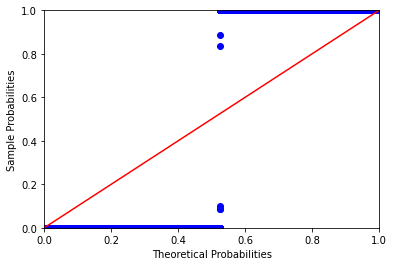

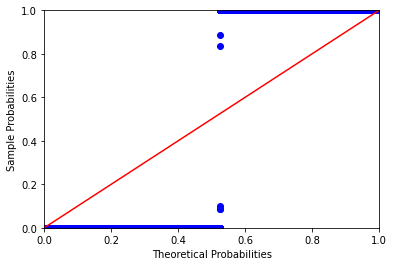

In [196]:
probplot.ppplot(line='45')

In [199]:
from sklearn.metrics import r2_score, mean_squared_error

In [200]:
mean_squared_error(y_test,lr_prediction)

52524473.50595576

In [214]:
#RMSE
np.sqrt(mean_squared_error(y_test,lr_prediction))

7247.377008680848

In [218]:
pre = pd.DataFrame({'actual': y_test, 'Predicted': lr_prediction})
pre

,actual,Predicted
5841,22990,27502.418232
6865,22199,21349.321294
6182,52990,38839.960599
5011,16990,22260.844276
9692,13990,11994.652636
...,...,...
7095,21099,26204.973641
11612,13000,2631.158042
11396,15799,23490.951081
10915,14999,16948.126445


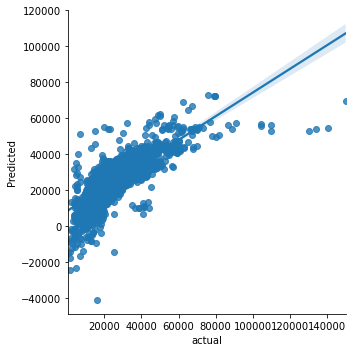

In [219]:
sns.lmplot('actual','Predicted',data=pre)

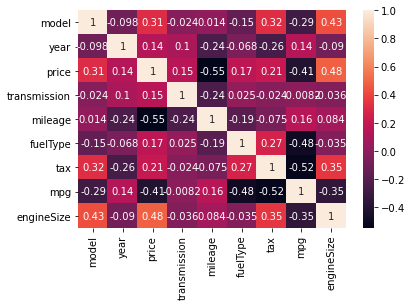

In [220]:
sns.heatmap(df.corr(),annot=True)

# Thank You